# TODO: TimeSeries of Articles

- with label = PROCESSED  
- save plot  
- visual aid: each scraped batch has to overlap with existing articles

In [1]:
import pandas as pd
import sqlite3
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
def create_connection(db_file):
    """ create a database connection to the SQLite database
        specified by the db_file
    :param db_file: database file
    :return: Connection object or None
    """
    conn = None
    try:
        conn = sqlite3.connect(db_file)
    except Error as e:
        print(e)
 
    return conn

In [3]:
conn = create_connection('../../scraping538.db')
query = "SELECT * FROM S_ARTICLES_538"
articles_all = pd.read_sql(query, con=conn)

articles_all.shape

(9812, 14)

In [4]:
articles_all.head(2)

,title,date,hour,date_hour,author,filed_under,article_text,mini_bio,url,project,spider,server,date_import,PROCESSED
0,Can The Warriors Still Win Without Curry? And ...,"Oct. 31, 2019",2:08 PM,"Oct. 31, 2019-2:08 PM",Chris Herring,NBA,Just when you thought things couldn’t get any ...,Chris Herring is a senior sportswriter for Fiv...,https://fivethirtyeight.com/features/can-the-w...,scrapping_538,all_articles,mrmoe,2019-11-02 21:54:30.067303,1
1,The Impeachment Inquiry Will Now Be Televised,"Oct. 31, 2019",1:11 PM,"Oct. 31, 2019-1:11 PM",Clare Malone,The Spin Cycle,"Welcome to The Spin Cycle, a semi-regular look...",Clare Malone is a senior political writer for ...,https://fivethirtyeight.com/features/the-impea...,scrapping_538,all_articles,mrmoe,2019-11-02 21:54:30.076293,1


# Simple Approach - col: DATE

In [5]:
sns.set(rc={'figure.figsize':(11, 4)})

In [6]:
date = articles_all['date']
date = pd.to_datetime(date)\
         .dt.floor('d')\
         .value_counts()\
         .rename_axis('date')

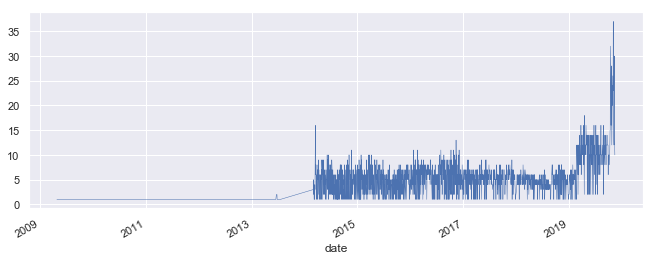

In [7]:
date.plot(linewidth=0.5);

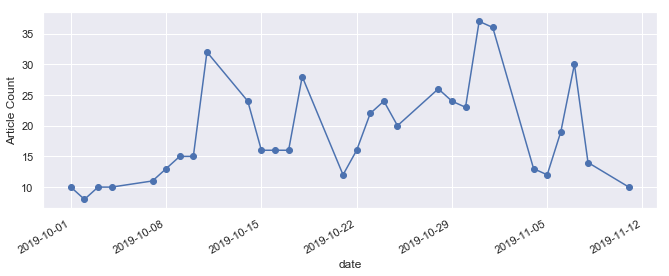

In [8]:
ax = date.loc['2019-10':'2019-12'].plot(marker='o', linestyle='-')
ax.set_ylabel('Article Count');